# **2주차 과제**

## Q1. 데이터 전처리 - 결측치

In [1]:
# 데이터 불러오기 및 확인

import pandas as pd

order_df = pd.read_csv('./data_1/eda_order.csv')
print('='*25, 'eda_order.csv 정보입니다', '='*25)
display(order_df)

========================= eda_order.csv 정보입니다 =========================


,order_id,user_id,product_id,order_date,quantity,discount_ratio,pay_date
0,1.0,960.0,17.0,2023-02-07,6.0,0.004746,2023-02-09
1,6.0,1447.0,6.0,2023-01-12,6.0,0.008240,2023-01-14
2,14.0,1325.0,17.0,2023-02-15,6.0,0.039391,NaN
3,17.0,102.0,1.0,2023-02-20,6.0,0.007944,2023-02-26
4,38.0,94.0,8.0,2023-02-11,6.0,0.014037,2023-02-13
...,...,...,...,...,...,...,...
4995,2695.0,99.0,7.0,2023-02-27,46.0,0.313272,NaN
4996,3166.0,552.0,7.0,2023-02-26,46.0,0.056302,NaN
4997,3092.0,149.0,7.0,2023-02-20,58.0,0.142290,2023-02-22
4998,3700.0,620.0,7.0,2023-02-21,36.0,0.119259,2023-02-21


In [2]:
#결측치 제거 전
print('='*25, '결측치 제거 이전', '='*25) #구분선 제작
print(order_df.info())
print("\n 컬럼별 결측치 개수:\n", order_df.isnull().sum())

#결측치 제거
order_df_drop = order_df.dropna()

#결측치 제거 후 
print('\n' + '='*25,'결측치 제거 이후', '='*25)
print(order_df_drop.info())
print("\n컬럼별 결측치 개수:\n", order_df_drop.isnull().sum())

========================= 결측치 제거 이전 =========================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        5000 non-null   float64
 1   user_id         5000 non-null   float64
 2   product_id      5000 non-null   float64
 3   order_date      5000 non-null   object 
 4   quantity        5000 non-null   float64
 5   discount_ratio  5000 non-null   float64
 6   pay_date        3738 non-null   object 
dtypes: float64(5), object(2)
memory usage: 273.6+ KB
None

 컬럼별 결측치 개수:
 order_id             0
user_id              0
product_id           0
order_date           0
quantity             0
discount_ratio       0
pay_date          1262
dtype: int64

========================= 결측치 제거 이후 =========================
<class 'pandas.core.frame.DataFrame'>
Index: 3738 entries, 0 to 4998
Data columns (total 7 columns):
 #   Column    

---
# Q2. 유저별로 첫 방문일자와 최근 방문일자 확인

In [3]:
# Q2. 유저별 첫 방문일자와 최근 방문일자 확인 - 데이터 불러오기

visit_df = pd.read_csv('./data_1/eda_visit.csv')  # 방문 데이터 CSV 불러오기
display(visit_df)  # 데이터 미리보기


,user_id,source,campaign,timestamp
0,1017.0,NaN,NaN,2022-12-15 13:06:36.361808000
1,1017.0,NaN,NaN,2023-02-20 02:46:59.416083200
2,1017.0,b,campaign_8,2023-02-08 13:10:49.026771200
3,1398.0,b,campaign_6,2023-01-07 06:37:27.756224000
4,1398.0,NaN,NaN,2023-01-19 00:49:56.166291200
...,...,...,...,...
2214,19.0,NaN,NaN,2022-12-31 02:33:28.486646400
2215,19.0,NaN,NaN,2023-04-19 06:42:09.471859200
2216,19.0,NaN,NaN,2023-01-20 02:39:59.212771200
2217,868.0,NaN,NaN,2023-01-08 04:00:25.681513600


In [5]:
# timestamp 컬럼을 datetime으로 변환
visit_df['timestamp'] = pd.to_datetime(visit_df['timestamp'])

# user_id별로 첫 방문일자(min), 마지막 방문일자(max) 집계
visit_group = visit_df.groupby('user_id')['timestamp'].agg(first_date='min', recent_date='max').reset_index()

# 결과 출력
display(visit_group)



,user_id,first_date,recent_date
0,2.0,2022-11-18 13:32:19.457043200,2023-04-04 18:35:23.424323200
1,4.0,2023-01-20 05:48:04.159916800,2023-02-16 17:37:50.886953600
2,5.0,2023-01-24 05:33:01.551558400,2023-01-24 05:33:01.551558400
3,6.0,2022-12-24 21:35:51.627040000,2023-03-16 22:33:14.782166400
4,7.0,2022-12-23 08:13:26.529830400,2023-01-04 11:38:32.537126400
...,...,...,...
714,1486.0,2022-11-15 14:28:22.264838400,2023-04-27 19:55:14.478800000
715,1488.0,2022-11-08 13:44:49.606659200,2023-04-14 07:36:10.313782400
716,1492.0,2023-02-04 06:25:28.477433600,2023-03-04 07:00:51.261228800
717,1494.0,2023-02-11 09:16:39.744742400,2023-04-11 04:13:27.064892800


---
# Q3. 유저별 서비스 이용기간 확인

In [11]:
visit_group['first_date'] = pd.to_datetime(visit_group['first_date'])
visit_group['recent_date'] = pd.to_datetime(visit_group['recent_date'])

visit_group_sorted = visit_group.sort_values(by='service_period', ascending=False)
display(visit_group_sorted)



,user_id,first_date,recent_date,service_period
262,546.0,2022-11-18 18:09:06.901977600,2023-05-23 23:09:39.627158400,186.208712
661,1365.0,2022-10-07 14:14:09.752329601,2023-04-07 18:13:20.279174400,182.166094
675,1396.0,2022-11-20 07:17:20.257548800,2023-05-19 21:14:13.673203200,180.581174
699,1448.0,2022-11-20 02:07:35.142374400,2023-05-18 16:01:41.751561600,179.579243
114,240.0,2022-10-09 09:10:37.274332800,2023-04-04 07:01:03.403747200,176.910025
...,...,...,...,...
19,29.0,2023-02-01 07:31:45.367001600,2023-02-01 07:31:45.367001600,0.000000
2,5.0,2023-01-24 05:33:01.551558400,2023-01-24 05:33:01.551558400,0.000000
16,25.0,2023-03-31 17:19:45.531193600,2023-03-31 17:19:45.531193600,0.000000
13,21.0,2022-12-23 16:15:39.779952001,2022-12-23 16:15:39.779952001,0.000000


---
# Q4. 서비스 이용기간 분포 시각화

In [12]:
import plotly.express as px

# 히스토그램 그리기
fig = px.histogram(visit_group, 
                   x='service_period', 
                   nbins=20,               # 막대 개수 설정
                   color_discrete_sequence=['royalblue'])  # 색상 설정 (선택사항)

fig.update_layout(
    title='서비스 이용기간 분포',
    xaxis_title='Service Period (days)',
    yaxis_title='Count'
)

fig.show()


---
# Q5. quantity 상위 5개 product 확인

In [13]:
%whos DataFrame


Variable             Type         Data/Info
-------------------------------------------
order_df             DataFrame    Shape: (5000, 7)
order_df_drop        DataFrame    Shape: (3738, 7)
visit_df             DataFrame    Shape: (2219, 4)
visit_group          DataFrame    Shape: (719, 4)
visit_group_sorted   DataFrame    Shape: (719, 4)
visit_summary        DataFrame    Shape: (719, 3)


In [14]:
# Q5. product_id별 quantity 합계 집계
product_quantity = order_df.groupby('product_id')['quantity'].sum().reset_index()

# 결과 출력
display(product_quantity)


,product_id,quantity
0,1.0,3285.0
1,2.0,963.0
2,3.0,1626.0
3,4.0,1361.0
4,5.0,1745.0
5,6.0,1844.0
6,7.0,4702.0
7,8.0,1406.0
8,9.0,2765.0
9,10.0,902.0


In [15]:
# quantity 상위 5개 제품 추출
top5_product = product_quantity.sort_values(by='quantity', ascending=False).head(5)

# 결과 출력
display(top5_product)


,product_id,quantity
19,20.0,6871.0
6,7.0,4702.0
0,1.0,3285.0
8,9.0,2765.0
5,6.0,1844.0


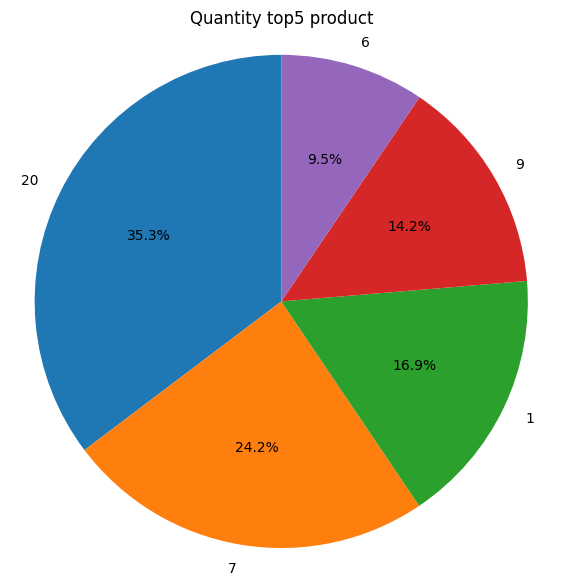

In [17]:
import matplotlib.pyplot as plt

# 데이터 준비 (top5_product: 앞에서 만든 top 5 DataFrame)
labels = top5_product['product_id'].astype(int).astype(str)  # 정수형으로 바꾸고 문자열로 변환 (ex. 20, 7 등)
sizes = top5_product['quantity']
title = "Quantity top5 product"

# 파이차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title(title)
plt.axis('equal')  # 원형 유지
plt.show()


---
# Q6. 분류별 발생건수 집계

In [4]:
import pandas as pd

# 1) 데이터 로드
df = pd.read_csv('./data_2/한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')

# 혹시 모를 공백/결측치 정리
df.columns = df.columns.str.strip()
for col in ['본부명', '지사명', '노선명']:
    if col in df.columns:
        df[col] = df[col].astype(str).str.strip().fillna('미상')

# 2) 공용 집계 함수: 특정 컬럼으로 사건 수 세고 상위 5개
def top5_counts(col):
    return (
        df.groupby(col)
          .size()
          .reset_index(name='발생건수')
          .sort_values('발생건수', ascending=False)
          .head(5)
          .reset_index(drop=True)
    )

# 3) 각 분류별 상위 5개
top5_head = top5_counts('본부명')
top5_branch = top5_counts('지사명')
top5_route = top5_counts('노선명')

# 4) 보기 좋게 출력
print('본부명  상위 5개')
display(top5_head)

print('\n지사명  상위 5개')
display(top5_branch)

print('\n노선명  상위 5개')
display(top5_route)


본부명  상위 5개


,본부명,발생건수
0,충북,22
1,대전충남,19
2,전북,14
3,강원,11
4,광주전남,11



지사명  상위 5개


,지사명,발생건수
0,진천,12
1,부안,9
2,함평,8
3,부여,6
4,제천,5



노선명  상위 5개


,노선명,발생건수
0,중부선,23
1,서해안선,17
2,당진대전선,7
3,서천공주선,6
4,영동선,4


---
# Q7. 함수 선언 - 데이터 검색

In [5]:

import pandas as pd

df = pd.read_csv('./data_2/한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')
display(df)

,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
...,...,...,...,...,...,...,...,...,...
82,광주전남,함평,서해안선,35~40,서울,35,3,35.109966,126.481287
83,광주전남,함평,서해안선,55~60,서울,55,3,35.273296,126.543684
84,대구경북,고령,광주대구선,165~170,광주,165,5,35.753698,128.359582
85,부산경남,창원,남해1지선,0~5,함안,0,3,35.271400,128.474403


In [9]:
def filter_func(data, branch_list, branch_col, sort_col):
    # 지사명 리스트에 포함된 행만 필터링
    for branch in branch_list:
        print(f"\n▶ {branch} 지사 정보")
        
        # 해당 지사 데이터만 추출
        temp = data[data[branch_col] == branch]
        
        # 발생건수 기준 내림차순 정렬 후 상위 5개 출력
        temp = temp.sort_values(by=sort_col, ascending=False).head(5)
        
        display(temp)


In [8]:
filter_func(
    data = df,
    branch_list = ['화성', '시흥', '경기광주'],
    branch_col = '지사명',
    sort_col = '발생건수'
)



▶ 화성 지사 정보


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994



▶ 시흥 지사 정보


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963



▶ 경기광주 지사 정보


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
5,서울경기,경기광주,중부선,345~350,통영,345,3,37.397767,127.310793
6,서울경기,경기광주,중부선,320~325,통영,320,3,37.207765,127.442214


---
# Q8.서울본부 지사들의 발생건수 시각화

================ 서울경기 본부 정보입니다 =================


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
5,서울경기,경기광주,중부선,345~350,통영,345,3,37.397767,127.310793
6,서울경기,경기광주,중부선,320~325,통영,320,3,37.207765,127.442214


================ 서울경기 시각화 결과입니다 =================


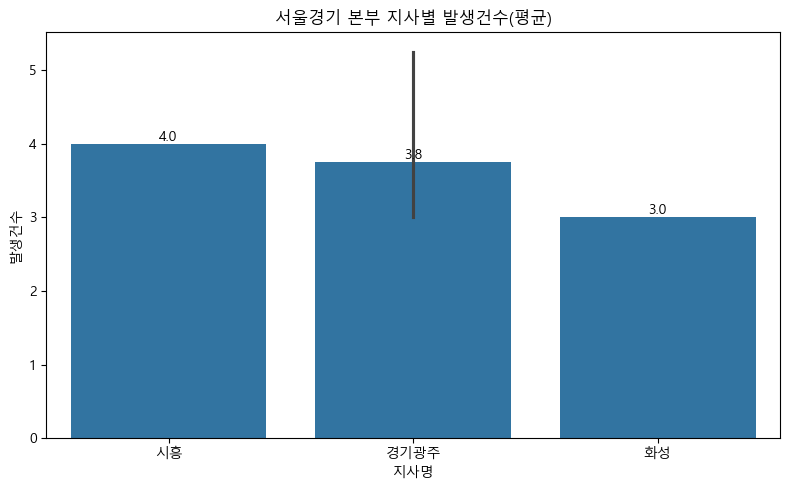

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 폰트/마이너스 깨짐 방지
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

#본부 중 '서울경기' 데이터만 선택
seoul = df[df['본부명'] == '서울경기'].copy()

# 어떤 데이터가 선택됐는지 확인
print('================ 서울경기 본부 정보입니다 =================')
display(seoul)

# 2) 지사별 발생건수 평균 집계 (seaborn 기본 집계=평균이지만, 정렬을 위해 미리 계산)
agg = (seoul.groupby('지사명', as_index=False)['발생건수']
            .mean()
            .rename(columns={'발생건수': '발생건수(평균)'}))

# 시각화 시 보기 좋게 내림차순 정렬 순서 지정
order = agg.sort_values('발생건수(평균)', ascending=False)['지사명']

# 3) 시각화 (기본 집계=평균)
print('================ 서울경기 시각화 결과입니다 =================')
plt.figure(figsize=(8,5))
ax = sns.barplot(data=seoul, x='지사명', y='발생건수', order=order)  
ax.set_xlabel('지사명')
ax.set_ylabel('발생건수')
ax.set_title('서울경기 본부 지사별 발생건수(평균)')

# 막대 위에 값 라벨 표시
for i, (name, val) in enumerate(agg.set_index('지사명').loc[order, '발생건수(평균)'].items()):
    ax.text(i, val, f'{val:.1f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Q9. 함수 선언

In [11]:
# 데이터 읽기 및 확인용 코드셀입니다. 참고용으로만 사용하셔도 괜찮습니다.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

print('='*25, '한국도로공사_로드킬 데이터 정보_20231231.csv 데이터입니다', '='*25)
df = pd.read_csv('./data_2/한국도로공사_로드킬 데이터 정보_20231231.csv', encoding='cp949')

display(df)

========================= 한국도로공사_로드킬 데이터 정보_20231231.csv 데이터입니다 =========================


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
...,...,...,...,...,...,...,...,...,...
82,광주전남,함평,서해안선,35~40,서울,35,3,35.109966,126.481287
83,광주전남,함평,서해안선,55~60,서울,55,3,35.273296,126.543684
84,대구경북,고령,광주대구선,165~170,광주,165,5,35.753698,128.359582
85,부산경남,창원,남해1지선,0~5,함안,0,3,35.271400,128.474403


In [14]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

def multi_center_bar_func(data, center_col, branch_col, accident_num_col, center_list):
    """입력받은 본부의 지사별 발생건수 평균을 bar 차트로 시각화"""
    # 입력 루프
    while True:
        center = input("본부명을 입력하세요: ").strip()
        if center in center_list:
            break
        print(f"{center} 본부는 존재하지 않습니다.\n다시 입력하세요")

    # 선택 본부 데이터
    sub = data.loc[data[center_col] == center, [branch_col, accident_num_col]].copy()
    print(f"\n{center} 본부 지사 정보")
    display(sub)

    # 지사별 평균 집계 및 정렬 순서
    order = (sub.groupby(branch_col)[accident_num_col]
               .mean()
               .sort_values(ascending=False)
               .index)

    # 시각화 (기본 집계=평균)
    plt.figure(figsize=(7.5,5))
    ax = sns.barplot(data=sub, x=branch_col, y=accident_num_col,
                     estimator=np.mean, order=order)
    ax.set_xlabel('지사명'); ax.set_ylabel('발생건수')
    ax.set_title(f'{center} 본부 지사별 발생건수(평균)')

    # 막대 위 라벨 + 전체 평균선
    mean_map = sub.groupby(branch_col)[accident_num_col].mean().reindex(order)
    for i, v in enumerate(mean_map):
        ax.text(i, v, f'{v:.1f}', ha='center', va='bottom', fontsize=10)
    overall_mean = mean_map.mean()
    ax.axhline(overall_mean, ls='--', lw=1)
    ax.text(len(order)-0.5, overall_mean, f'평균={overall_mean:.2f}', ha='right', va='bottom')

    plt.tight_layout()
    plt.show()


 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요
 본부는 존재하지 않습니다.
다시 입력하세요

서울경기 본부 지사 정보


,지사명,발생건수
0,화성,3
1,화성,3
2,시흥,4
3,경기광주,6
4,경기광주,3
5,경기광주,3
6,경기광주,3


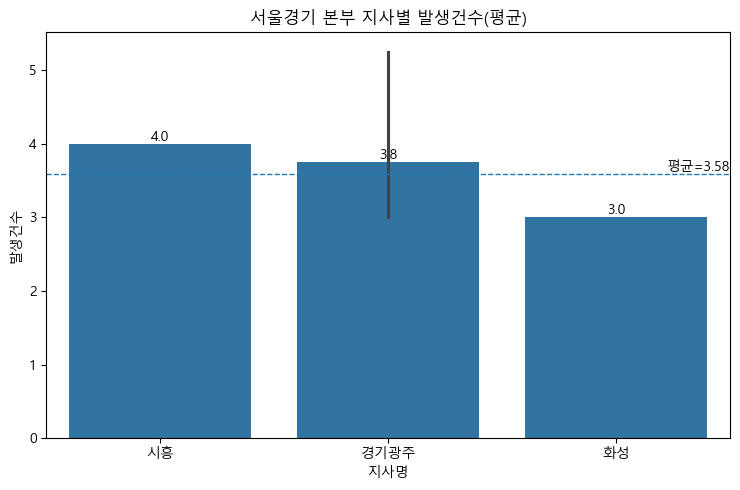

In [13]:
tmp_center_list = ['서울경기', '강원', '충북', '대전충남', '광주전남', '전북', '부산경남', '대구경북']

multi_center_bar_func(
    data=df,
    center_col='본부명',
    branch_col='지사명',
    accident_num_col='발생건수',
    center_list=tmp_center_list
)


---
# Q10. 지도 시각화 - 서울경기 본부 중 발생건수 가장 많은 지사

In [20]:
import folium

# 서울경기 본부 데이터만 선택
seoul = df[df['본부명'] == '서울경기'].copy()

print('='*25, '본부명 중에서 "서울경기"만 선택한 결과입니다.', '='*25)
display(seoul)

# 지사별 발생건수 합계 기준 내림차순 정렬
agg = (seoul.groupby(['지사명', '위도', '경도'], as_index=False)['발생건수']
             .sum()
             .sort_values('발생건수', ascending=False))

print('='*25, '서울경기 본부 지사별 발생건수 합계 (내림차순)', '='*25)
display(agg)

# 가장 많이 발생한 지사 (상단 1개)
top_branch = agg.iloc[0]
print(f"\n가장 많은 발생건수 지사: {top_branch['지사명']} ({top_branch['발생건수']}건)")

# Folium 지도 시각화
m = folium.Map(location=[top_branch['위도'], top_branch['경도']], zoom_start=11)
folium.Marker(
    location=[top_branch['위도'], top_branch['경도']],
    popup=f"{top_branch['지사명']} 지사\n발생건수: {top_branch['발생건수']}",
    tooltip="발생건수 최다 지사"
).add_to(m)

print('='*25, 'Folium Map을 통해 시각화한 결과입니다.', '='*25)
display(m)


========================= 본부명 중에서 "서울경기"만 선택한 결과입니다. =========================


,본부명,지사명,노선명,구간,방향,5km,발생건수,위도,경도
0,서울경기,화성,서해안선,310~315,목포,310,3,37.217471,126.871994
1,서울경기,화성,서해안선,310~315,서울,310,3,37.217471,126.871994
2,서울경기,시흥,수도권제1순환선,100~105,판교,100,4,37.419086,126.828963
3,서울경기,경기광주,중부선,325~330,통영,325,6,37.248957,127.421370
4,서울경기,경기광주,중부선,325~330,하남,325,3,37.248957,127.421370
5,서울경기,경기광주,중부선,345~350,통영,345,3,37.397767,127.310793
6,서울경기,경기광주,중부선,320~325,통영,320,3,37.207765,127.442214


========================= 서울경기 본부 지사별 발생건수 합계 (내림차순) =========================


,지사명,위도,경도,발생건수
1,경기광주,37.248957,127.421370,9
4,화성,37.217471,126.871994,6
3,시흥,37.419086,126.828963,4
0,경기광주,37.207765,127.442214,3
2,경기광주,37.397767,127.310793,3



가장 많은 발생건수 지사: 경기광주 (9건)
========================= Folium Map을 통해 시각화한 결과입니다. =========================
